# An introduction to TRviz

## Quick start: Visualizing tandem repeat sequences

In [1]:
from trviz.main import TandemRepeatVizWorker

ID: simple_example_1
Motifs: ['CGG']
Loaded 10 tandem repeat sequences
Decomposing TR sequences
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Encoding
Alignment
Visualization


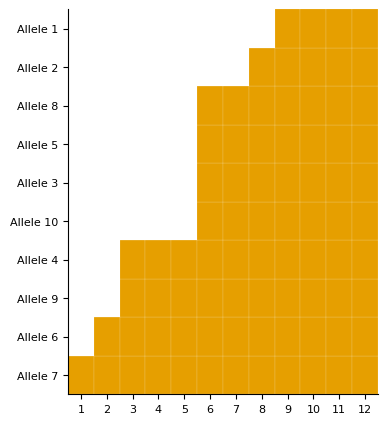

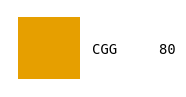

In [2]:
tr_visualizer = TandemRepeatVizWorker()

tr_id = "simple_example_1"
tr_sequences = ['CGGCGGCGGCGG',
                'CGGCGGCGGCGGCGG',
                'CGGCGGCGGCGGCGGCGGCGG',
                'CGGCGGCGGCGGCGGCGGCGGCGGCGGCGG',
                'CGGCGGCGGCGGCGGCGGCGG',
                'CGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGG',
                'CGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGG',
                'CGGCGGCGGCGGCGGCGGCGG',
                'CGGCGGCGGCGGCGGCGGCGGCGGCGGCGG',
                'CGGCGGCGGCGGCGGCGGCGG',
               ]
sample_ids = [f"Allele {x}" for x in range(1, len(tr_sequences) + 1)]
motifs = ['CGG']

tr_visualizer.generate_trplot(tr_id, 
                              sample_ids, 
                              tr_sequences, 
                              motifs, 
                              show_figure=True, # This is for showing the figure on the notebook
                              )  

The generated figure shows the tandem repeat sequences decomposed as motifs. Each row represents an allele, and the x-axis shows the index of motifs. Boxes represent motifs, and white spaces are gaps introduced by multiple sequence alignment.
The bottom figure shows the color to motif sequence mapping and the frequency in all alleles.

## Visualizing tandem repeats with multiple motifs
TRviz can identify motifs not given in the input motif set. However, providing other motifs as an input may yield better decomposition.

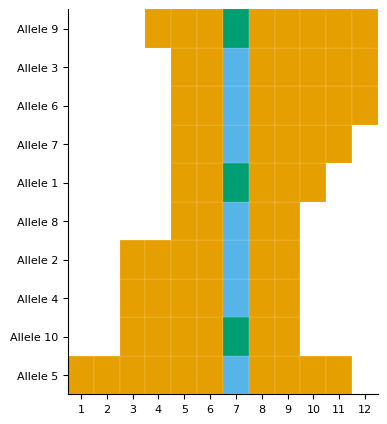

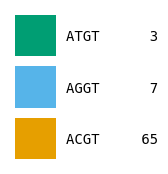

In [3]:
tr_visualizer = TandemRepeatVizWorker()
tr_id = "VariantMotif"
tr_sequences = ['ACGTACGTATGTACGTACGTACGT',
                'ACGTACGTACGTACGTAGGTACGTACGT',
                'ACGTACGTAGGTACGTACGTACGTACGTACGT',
                'ACGTACGTACGTACGTAGGTACGTACGT',
                'ACGTACGTACGTACGTACGTACGTAGGTACGTACGTACGTACGT',
                'ACGTACGTAGGTACGTACGTACGTACGTACGT',
                'ACGTACGTAGGTACGTACGTACGTACGT',
                'ACGTACGTAGGTACGTACGT',
                'ACGTACGTACGTATGTACGTACGTACGTACGTACGT',
                'ACGTACGTACGTACGTATGTACGTACGT',
           ]
sample_ids = [f"Allele {x}" for x in range(1, len(tr_sequences) + 1)]
motifs = ['ACGT']  # A consensus motif is given

# Seattle plot (default)
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids, 
                              tr_sequences, 
                              motifs, 
                              show_figure=True,
                              verbose=False,
                             )

## Visualizing the same sequences with a different motif set

ID: VariantMotif
Motifs: ['AC', 'AG', 'AT', 'GT']
Loaded 10 tandem repeat sequences
Decomposing TR sequences
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Encoding
Alignment
Visualization


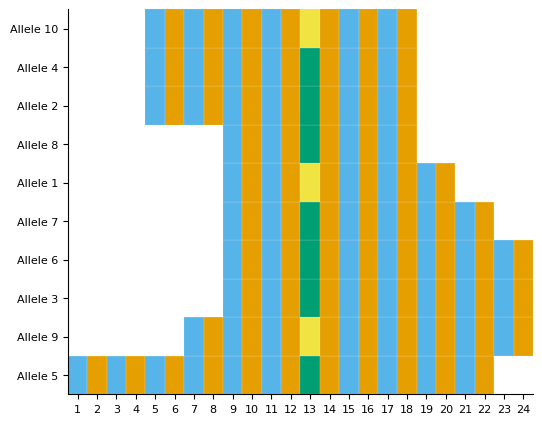

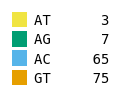

In [4]:
# Dinucleotide motifs
dinucleotide_motifs = ['AC', 'AG', 'AT', 'GT']
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids, 
                              tr_sequences, 
                              dinucleotide_motifs, 
                              show_figure=True,
                             )

## Waterfall plot vs Seattle plot (default)

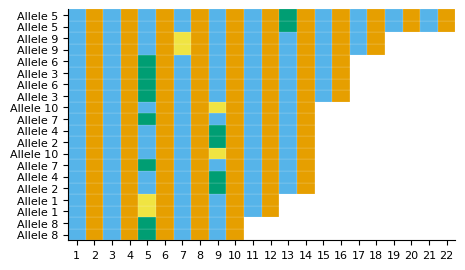

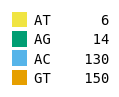

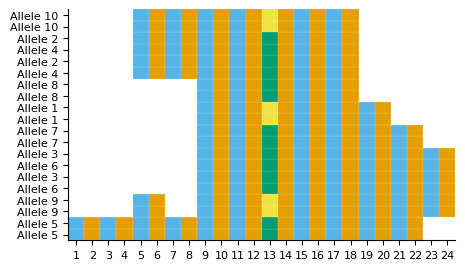

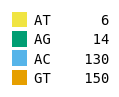

In [5]:
# Waterfall plot
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids*2, # Doubled same sequences
                              tr_sequences*2, 
                              dinucleotide_motifs, 
                              style="waterfall",
                              figure_size=(5,3),
                              show_figure=True,
                              verbose=False,
                             )

# Seattle plot (Default)
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids*2, 
                              tr_sequences*2, 
                              dinucleotide_motifs, 
                              style="seattle",
                              figure_size=(5,3),
                              show_figure=True,
                              verbose=False,
                             )

## Adding colored labels for alleles (based on super population code)

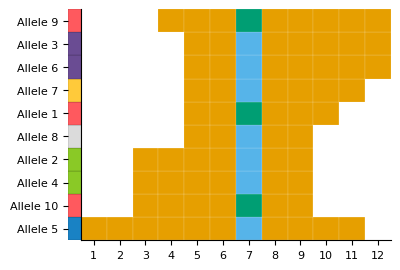

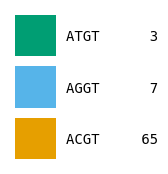

In [6]:
sample_to_super_population = {"Allele 1": "AFR", 
                              "Allele 2": "EAS",
                              "Allele 3": "AMR",
                              "Allele 4": "EAS",
                              "Allele 5": "SAS",
                              "Allele 6": "AMR",
                              "Allele 7": "EUR", 
                              "Allele 8": "Unknown", 
                              "Allele 9": "AFR",
                             "Allele 10": "AFR", }
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids, 
                              tr_sequences, 
                              motifs, 
                              sample_to_label=sample_to_super_population,
                              figure_size=(4,3),
                              verbose=False,
                              show_figure=True,
                             )

## Specyfing color palette

By default, TRviz automatically assigns distinct colors for motifs. Users can also give a (qualitative) color palette or color map as input. Please note that the same color may be assigned to different motifs if the number of colors in the color map is smaller than the motifs.

Default


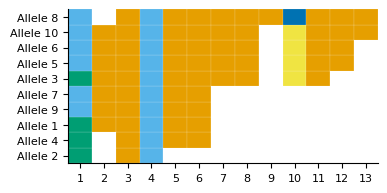

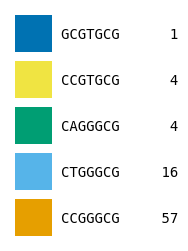

Tab10


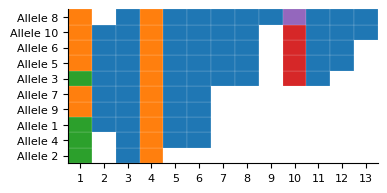

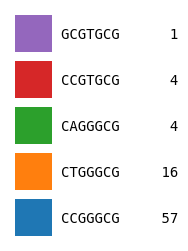

Pastel1


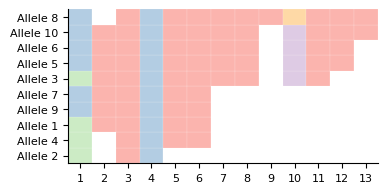

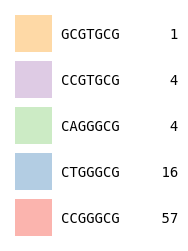

Set1


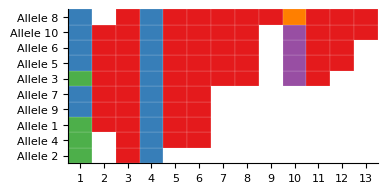

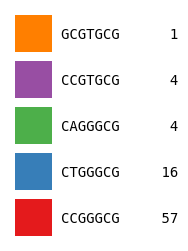

In [7]:
tr_visualizer = TandemRepeatVizWorker()
tr_id = "VariantMotif2"
tr_sequences = ['CAGGGCGCCGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCG',
                'CAGGGCGCCGGGCGCTGGGCG',
                'CAGGGCGCCGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCGCCGGGCGCCGGGCGCCGTGCGCCGGGCG',
                'CAGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCG',
                'CTGGGCGCCGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCGCCGGGCGCCGGGCGCCGTGCGCCGGGCGCCGGGCG',
                'CTGGGCGCCGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCGCCGGGCGCCGGGCGCCGTGCGCCGGGCGCCGGGCG',
                'CTGGGCGCCGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCG',
                'CTGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCGCCGGGCGCCGGGCGCCGGGCGGCGTGCGCCGGGCGCCGGGCGCCGGGCG',
                'CTGGGCGCCGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCG',
                'CTGGGCGCCGGGCGCCGGGCGCTGGGCGCCGGGCGCCGGGCGCCGGGCGCCGGGCGCCGTGCGCCGGGCGCCGGGCGCCGGGCG',
                
           ]
sample_ids = [f"Allele {x}" for x in range(1, len(tr_sequences) + 1)]
motifs = ['CCGGGCG']

print("Default")
tr_visualizer.generate_trplot(tr_id, sample_ids, tr_sequences, motifs, show_figure=True, verbose=False, figure_size=(4,2))

print("Tab10")
tr_visualizer.generate_trplot(tr_id, sample_ids, tr_sequences, motifs, show_figure=True, verbose=False, figure_size=(4,2), color_palette="tab10")

print("Pastel1")
tr_visualizer.generate_trplot(tr_id, sample_ids, tr_sequences, motifs, show_figure=True, verbose=False, figure_size=(4,2), color_palette="Pastel1")

print("Set1")
tr_visualizer.generate_trplot(tr_id, sample_ids, tr_sequences, motifs, show_figure=True, verbose=False, figure_size=(4,2), color_palette="Set1")


## Hiding edges of the motifs

ID: VariantMotif2
Motifs: ['CCGGGCG']
Loaded 10 tandem repeat sequences
Decomposing TR sequences
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Encoding
Alignment
Visualization


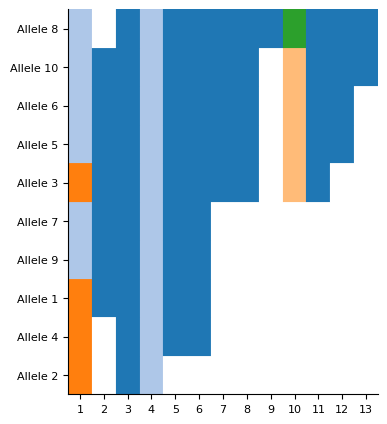

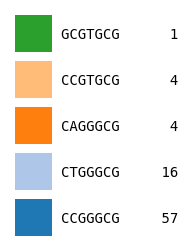

In [8]:
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids, 
                              tr_sequences, 
                              motifs, 
                              show_figure=True,
                              color_palette="tab20",
                              no_edge=True,
                             )

## Changing motif style

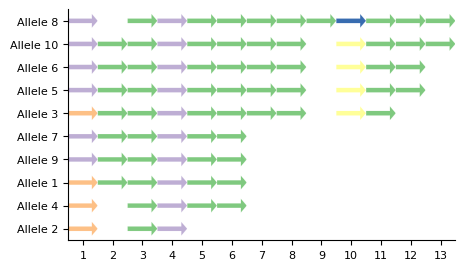

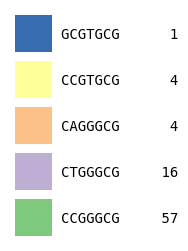

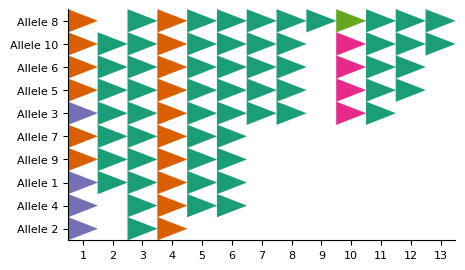

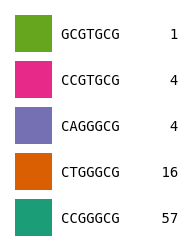

In [9]:
tr_visualizer.generate_trplot(tr_id, sample_ids, tr_sequences, motifs, show_figure=True, color_palette="Accent",
                              motif_style="arrow",
                              figure_size=(5,3),
                              verbose=False,
                             )

tr_visualizer.generate_trplot(tr_id, sample_ids, tr_sequences, motifs, show_figure=True, color_palette="Dark2",
                              motif_style="triangle",
                              figure_size=(5,3),
                              verbose=False,
                             )

## Adding a dendrogram

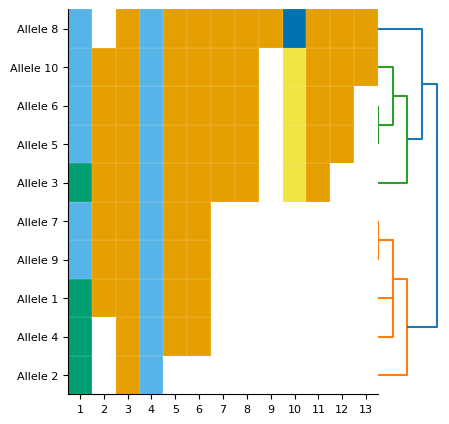

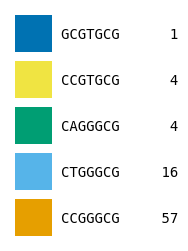

In [10]:
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids, 
                              tr_sequences, 
                              motifs, 
                              show_figure=True,
                              hide_dendrogram=False,
                              verbose=False,)

# Rotating a plot

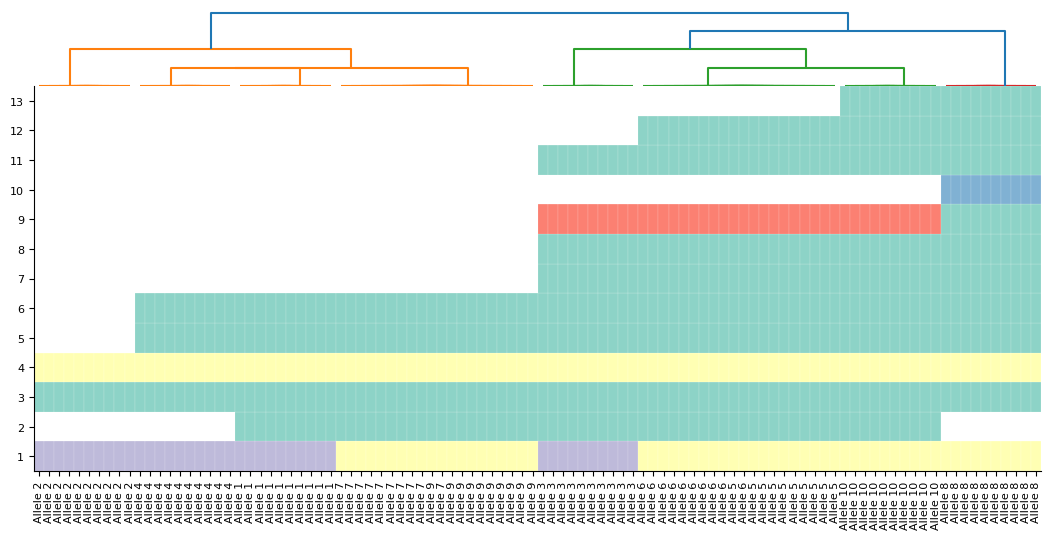

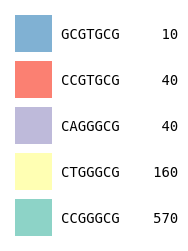

In [11]:
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids*10, 
                              tr_sequences*10, 
                              motifs, 
                              show_figure=True,
                              allele_as_row=False,
                              xlabel_rotation=90,
                              hide_dendrogram=False,
                              figure_size=(13, 5),
                              color_palette="Set3",
                              verbose=False, )

# An example of visualizing a complex VNTR

ID: SOL1
Motifs: ['GCTTCATCTCCTCCTCCTCACCTCCTGCTGTGGTGCACAGATACCTATAGGCAG']
Loaded 95 tandem repeat sequences
Decomposing TR sequences
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Encoding
Alignment
Visualization


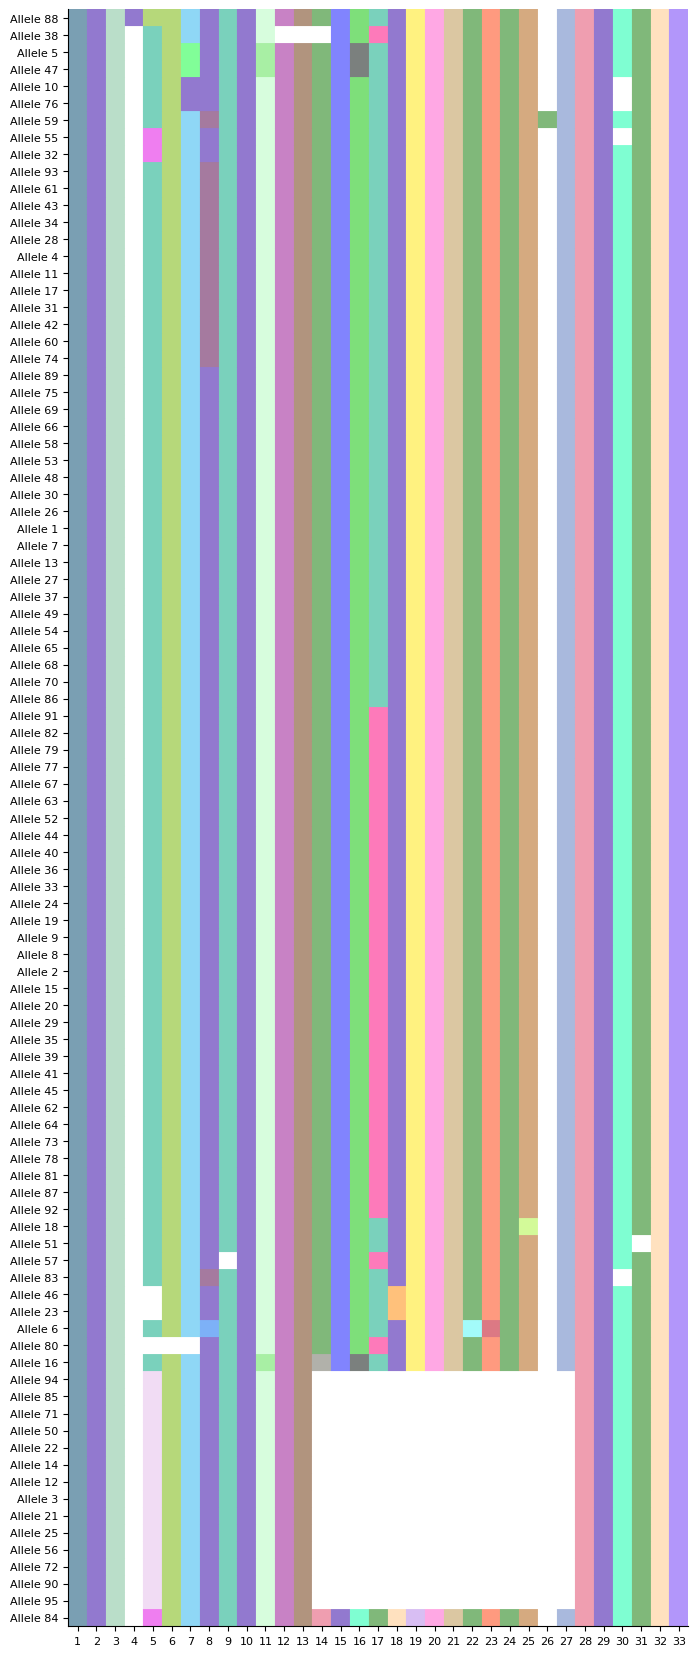

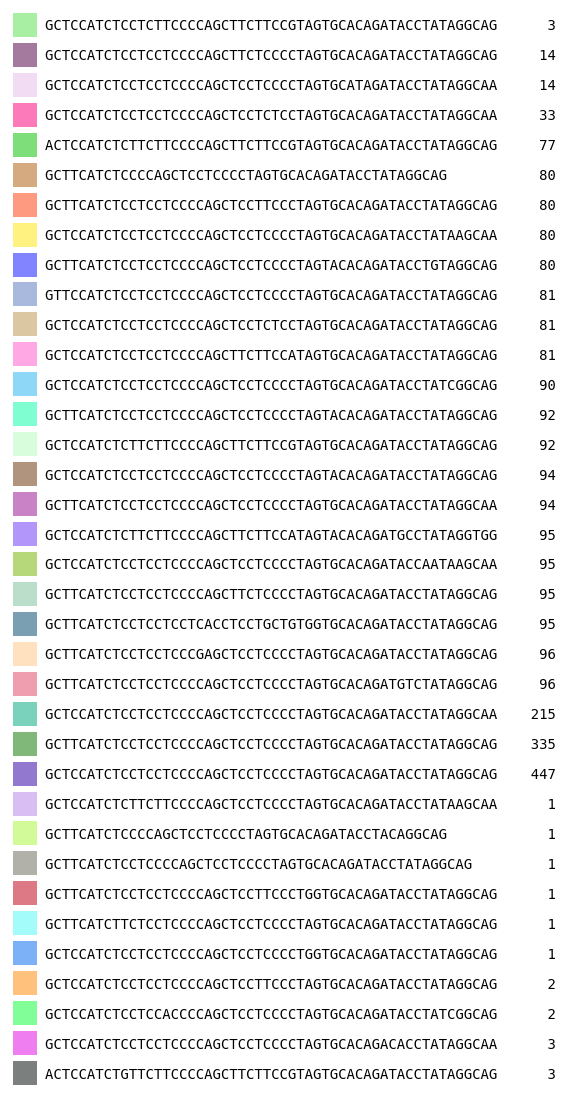

In [13]:
tr_id = "SOL1"
tr_sequences = []
with open("data/SORL1_tr_sequence.fa", "r") as f:
    for line in f:
        if not line.startswith(">"):
            tr_sequences.append(line.strip())
sample_ids = [f"Allele {x}" for x in range(1, len(tr_sequences) + 1)]
motifs = ['GCTTCATCTCCTCCTCCTCACCTCCTGCTGTGGTGCACAGATACCTATAGGCAG']
tr_visualizer.generate_trplot(tr_id, 
                              sample_ids, 
                              tr_sequences, 
                              motifs, 
                              show_figure=True,
                              no_edge=True,
                             )